In [ ]:
# Import essential data manipulation libraries
import pandas as pd  # For working with data in dataframes
import numpy as np   # For numerical operations and array manipulation

# Import data visualization libraries
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns           # For high-level data visualization

# Install the imbalanced-learn library for SMOTE
!pip install -U imbalanced-learn

# Import machine learning and data preprocessing libraries
from sklearn.linear_model import LassoCV          # Lasso regression with cross-validation
from sklearn.preprocessing import PolynomialFeatures  # Feature transformation for capturing non-linear relationships
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from imblearn.over_sampling import SMOTE            # Synthetic Minority Over-sampling Technique (SMOTE)
from sklearn.linear_model import Lasso              # Lasso regression

# Import tools for model evaluation and selection
from sklearn.model_selection import cross_val_score, KFold  # Cross-validation and splitting techniques
from sklearn.linear_model import LogisticRegression        # Logistic regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np  # Numerical operations

# Import a machine learning ensemble method
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier

# Import models for gradient boosting
!pip install catboost
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb


df = pd.read_csv('/content/diabetic_data.csv')

In [ ]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [ ]:
df.shape

(101766, 50)

In [ ]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

# Handling missing values

In [ ]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [ ]:
df['diag_1'] = df['diag_1'].str.replace('V', '', regex=False)
df['diag_2'] = df['diag_2'].str.replace('V', '', regex=False)
df['diag_3'] = df['diag_3'].str.replace('V', '', regex=False)

<ipython-input-9-c8de9959452c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'] = df['diag_1'].str.replace('V', '', regex=False)
<ipython-input-9-c8de9959452c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_2'] = df['diag_2'].str.replace('V', '', regex=False)


In [ ]:
df['citoglipton'].value_counts()

No    96446
Name: citoglipton, dtype: int64

In [ ]:
df['examide'].value_counts()

No    96446
Name: examide, dtype: int64

In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


# Feature Engineering

In [ ]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [ ]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [ ]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [ ]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [ ]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

In [ ]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [ ]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [ ]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [ ]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [ ]:
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [ ]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [ ]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [ ]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [ ]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0

    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

# Exploratory Data analysis

<ipython-input-28-b1128444b3c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

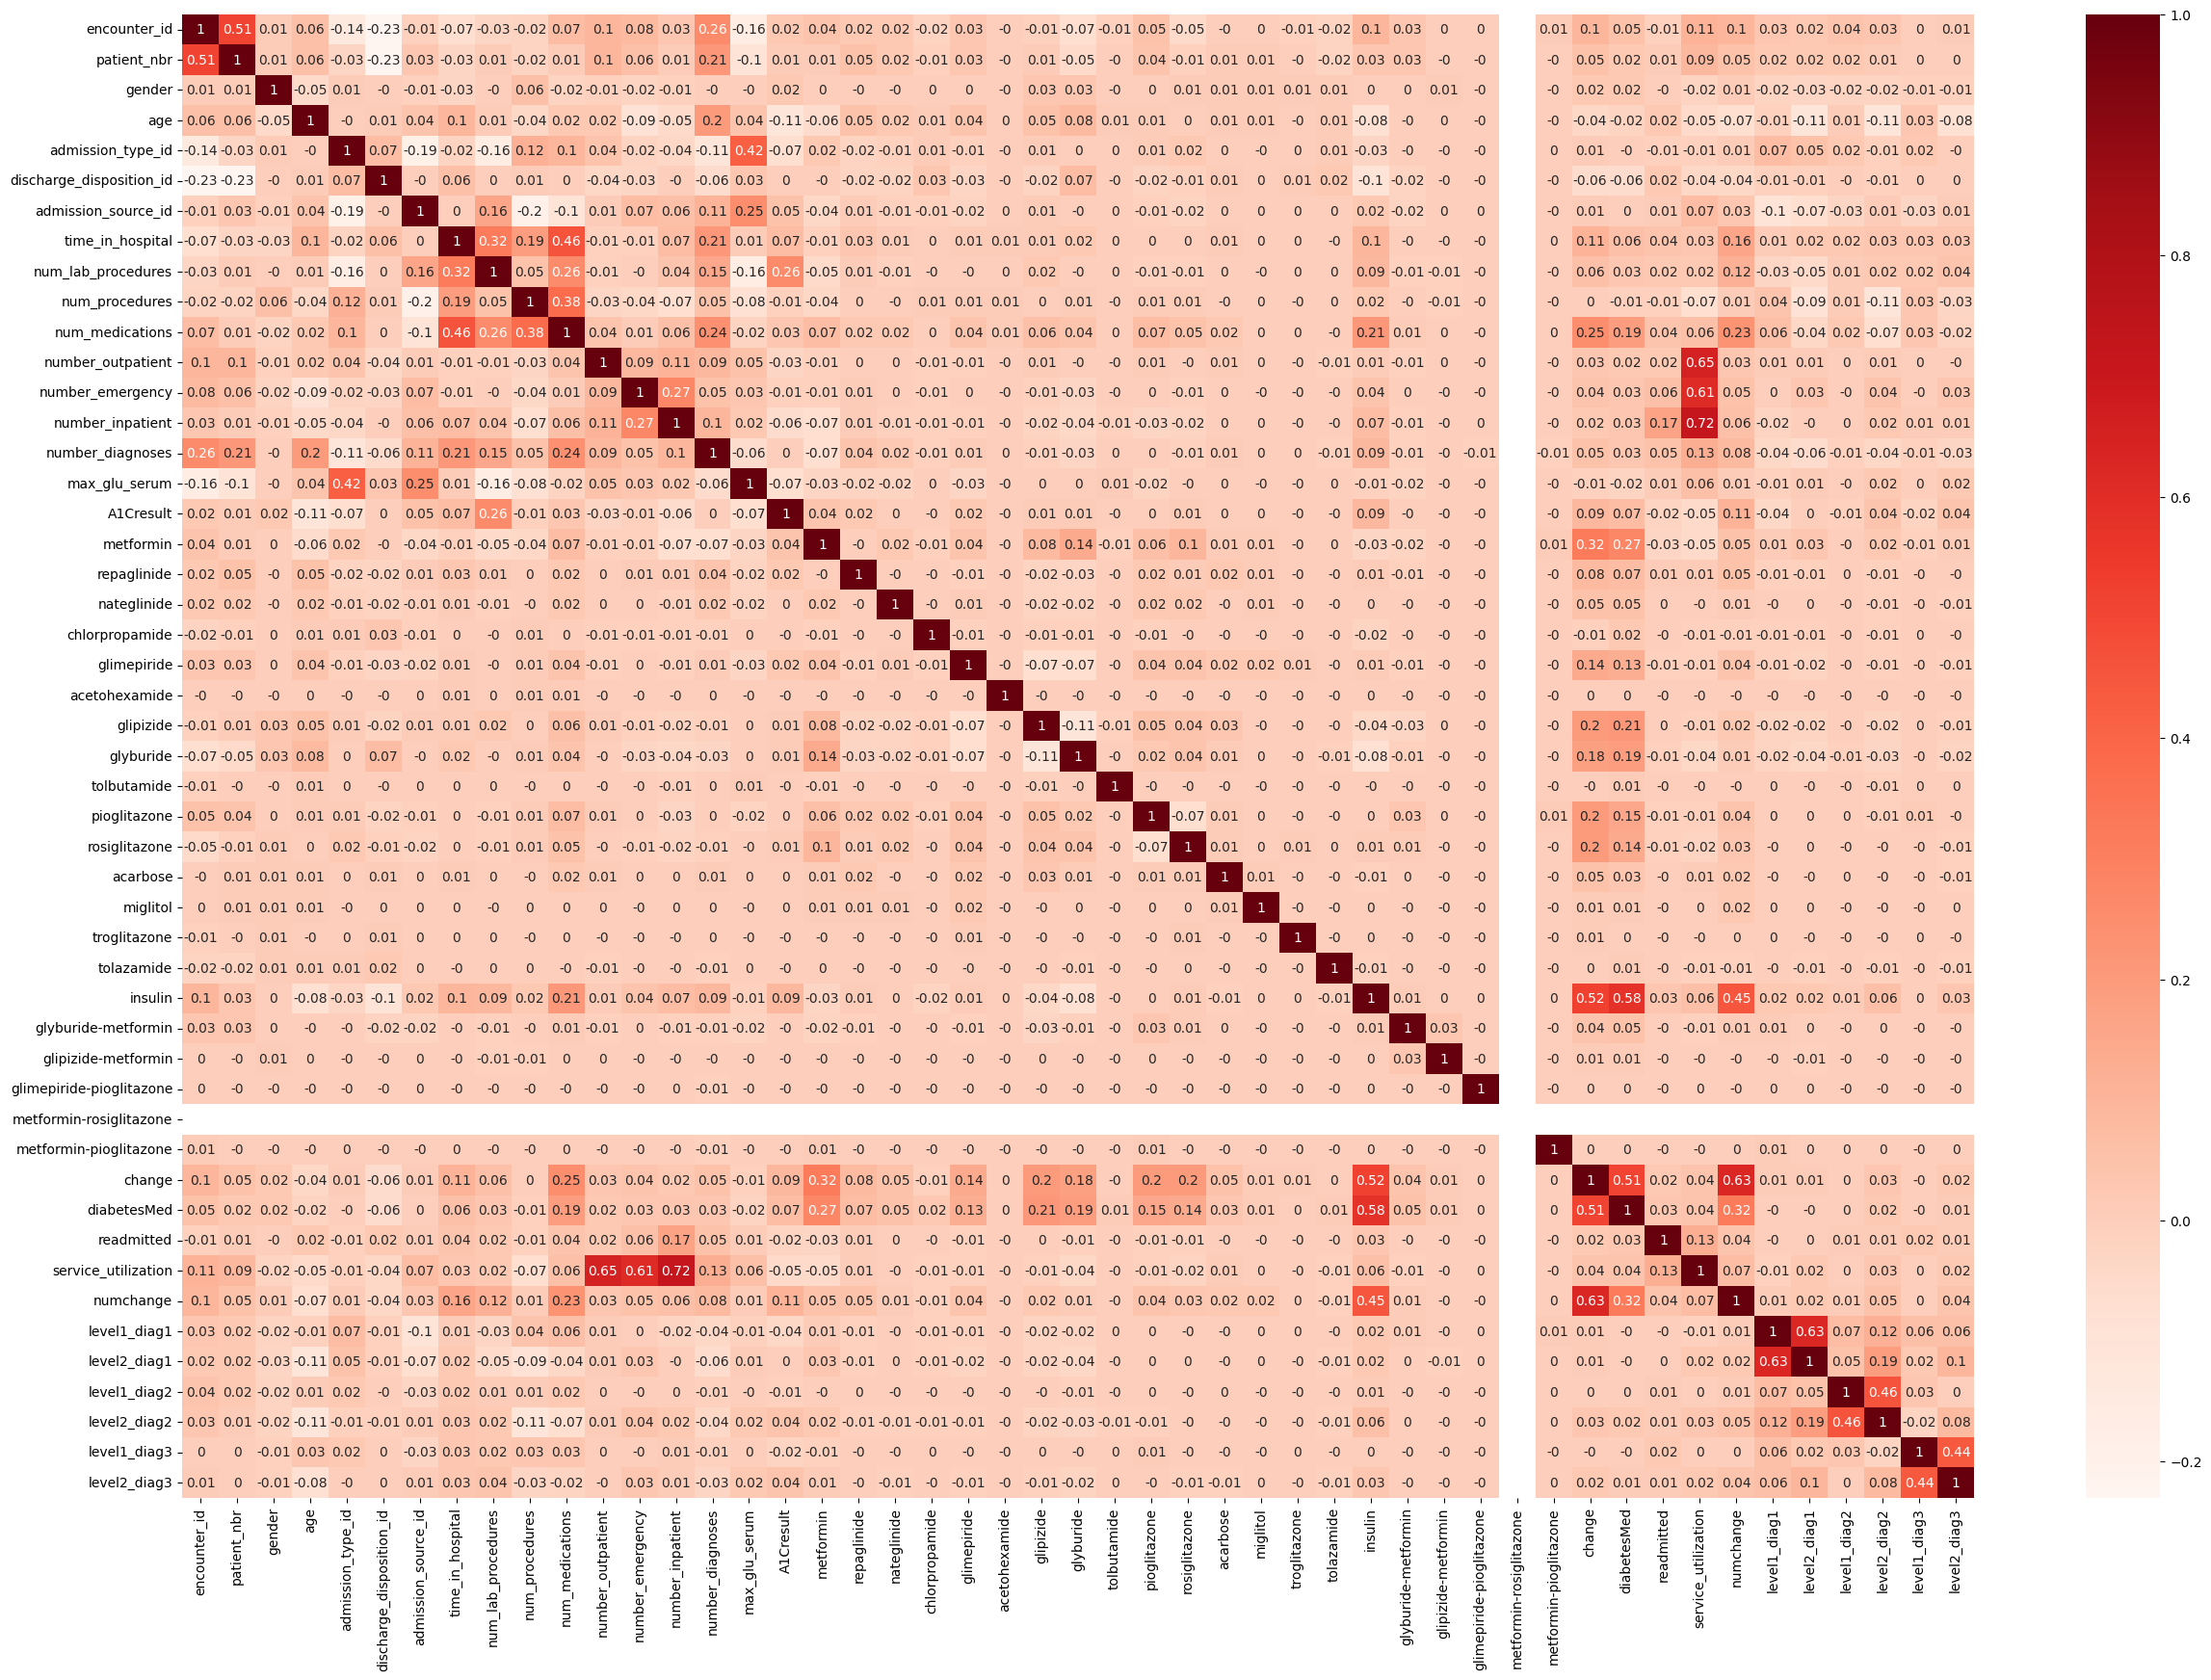

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, cmap = 'Reds')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

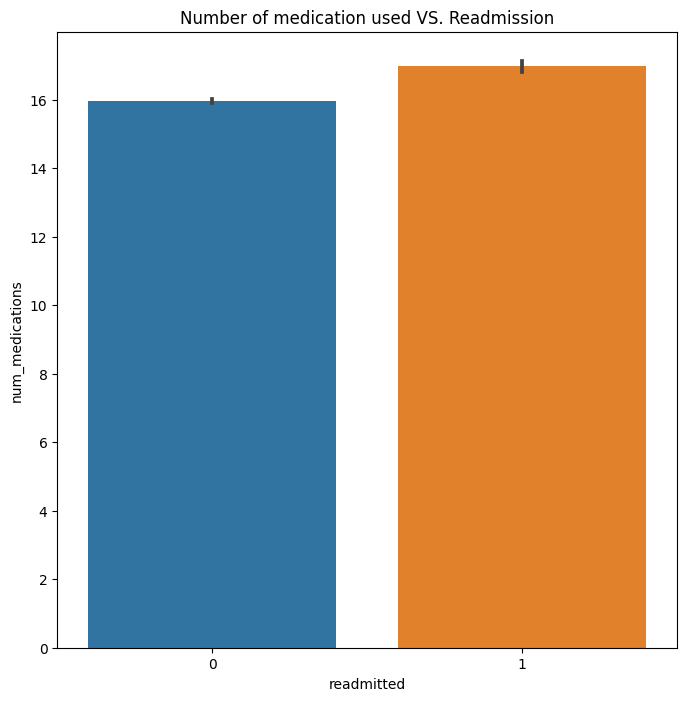

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

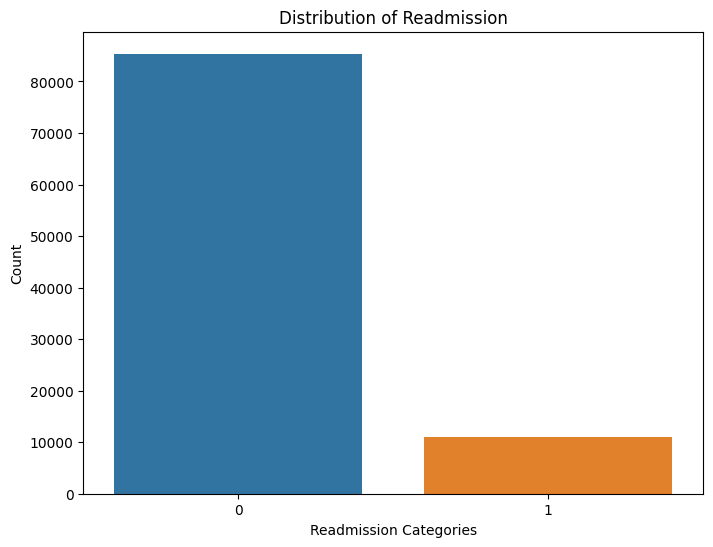

In [ ]:
# Create a countplot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='readmitted')

# Set plot title and labels
plt.title('Distribution of Readmission')
plt.xlabel('Readmission Categories')
plt.ylabel('Count')

plt.show()



<ipython-input-31-6e3f62b3c878>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['readmitted'] == 0), 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')
<ipython-input-31-6e3f62b3c878>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['readmitted'] == 1), 'time_in_hospital'], color='r', shade=True, label='Readmitted')


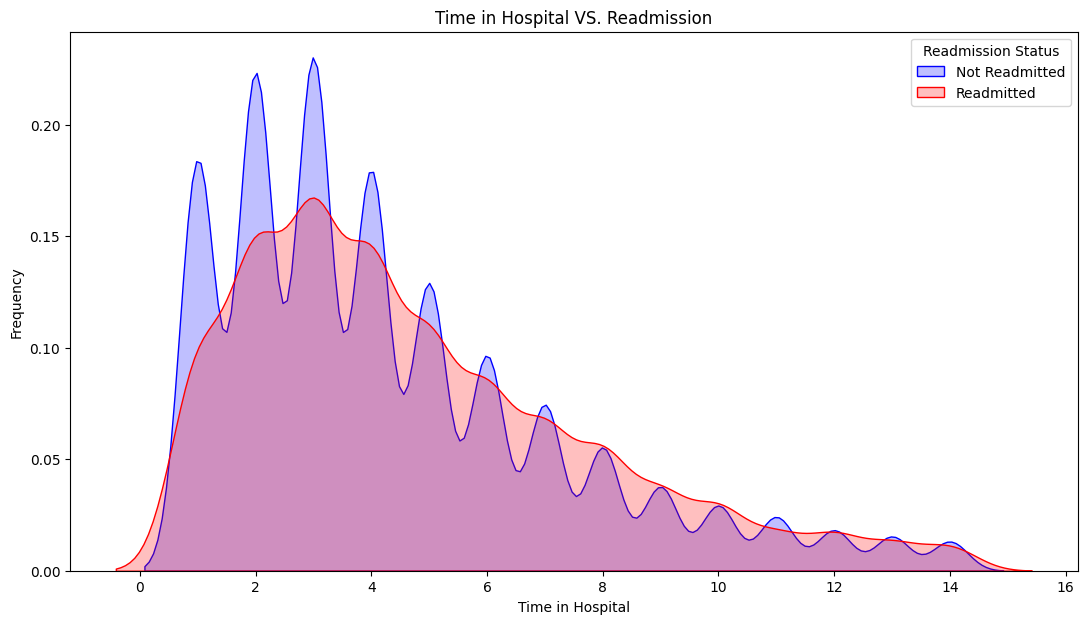

In [ ]:
fig = plt.figure(figsize=(13, 7))

ax = sns.kdeplot(df.loc[(df['readmitted'] == 0), 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')

ax = sns.kdeplot(df.loc[(df['readmitted'] == 1), 'time_in_hospital'], color='r', shade=True, label='Readmitted')

ax.set(xlabel='Time in Hospital', ylabel='Frequency')

plt.title('Time in Hospital VS. Readmission')

plt.legend(title='Readmission Status', loc='best')

plt.show()


Text(0.5, 1.0, 'Age of Patient VS. Readmission')

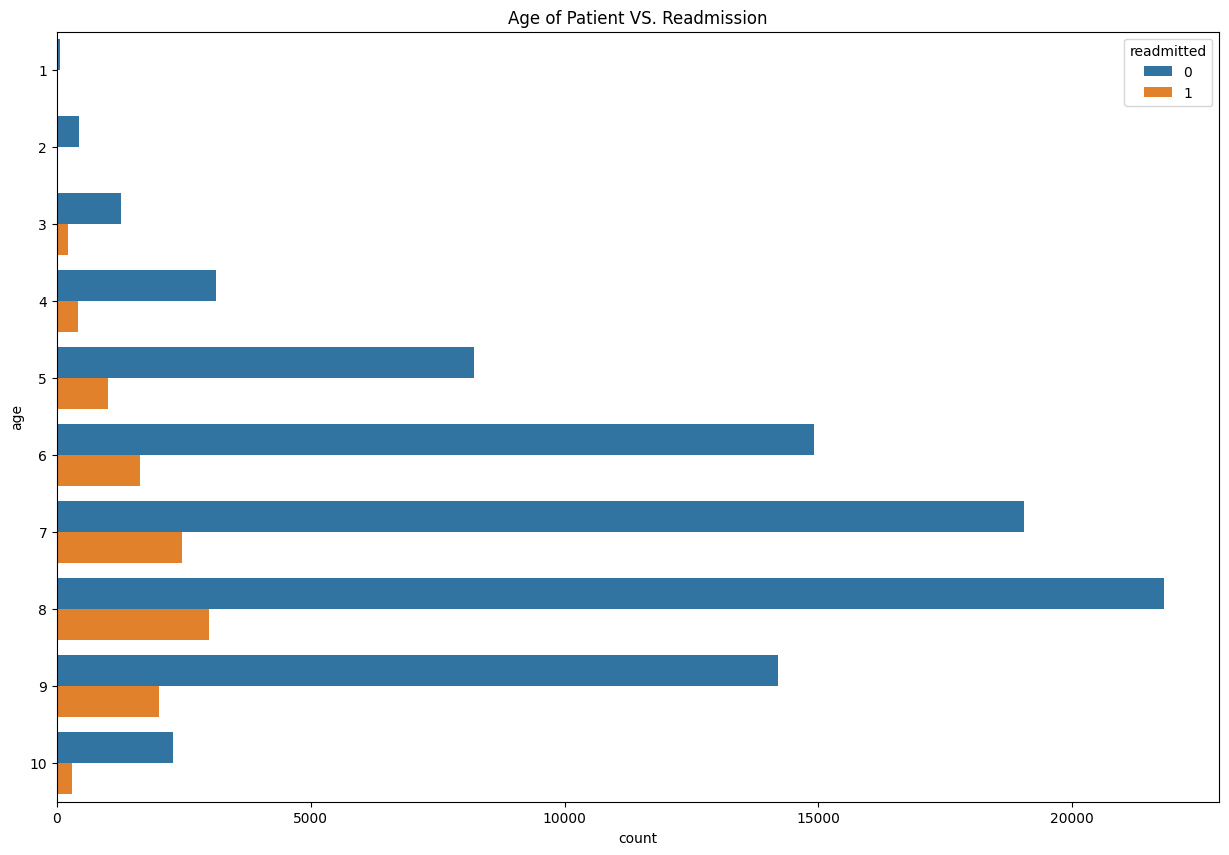

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<Axes: xlabel='count', ylabel='race'>

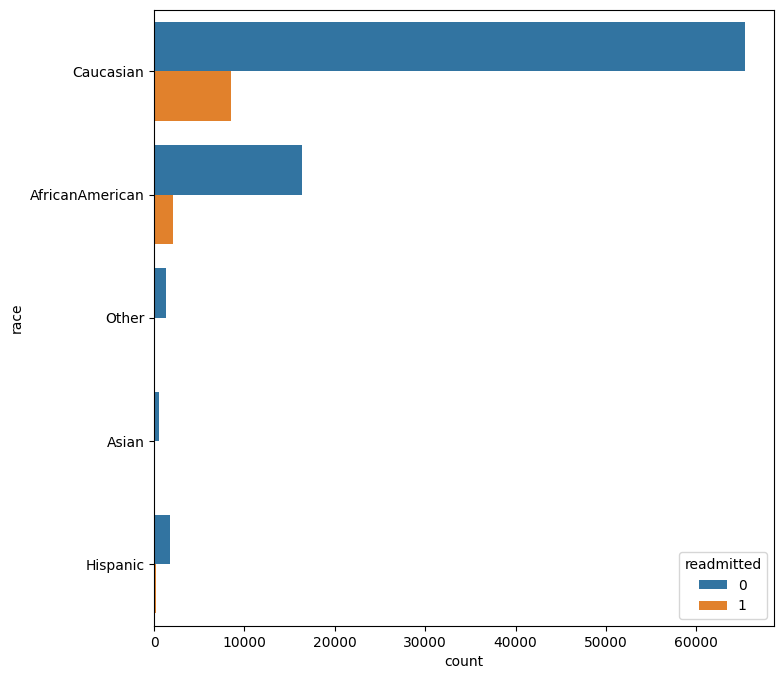

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

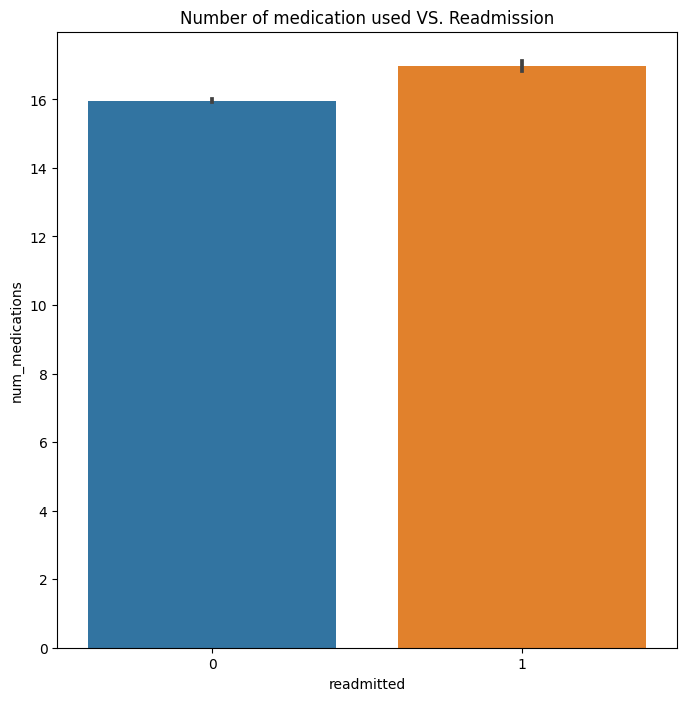

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

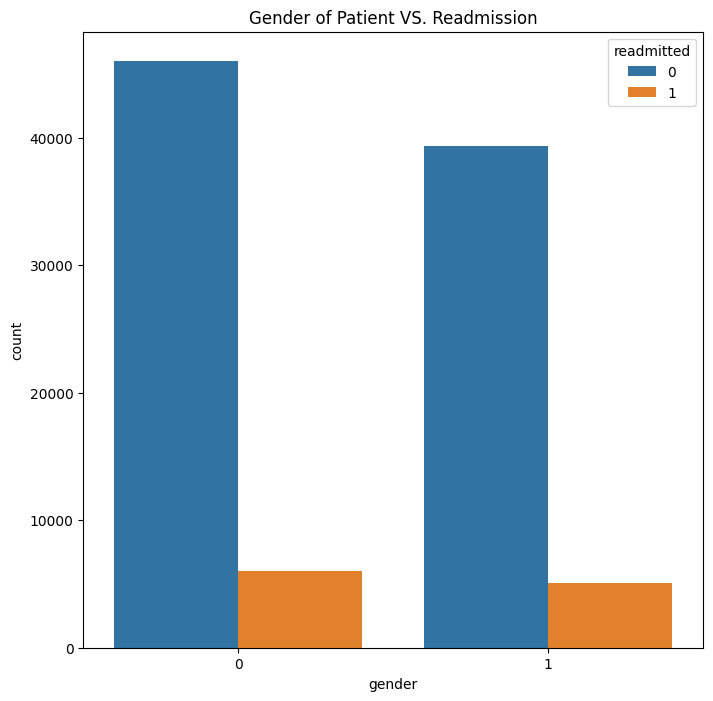

In [ ]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='gender', hue='readmitted')
plt.title("Gender of Patient VS. Readmission")
plt.show()

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

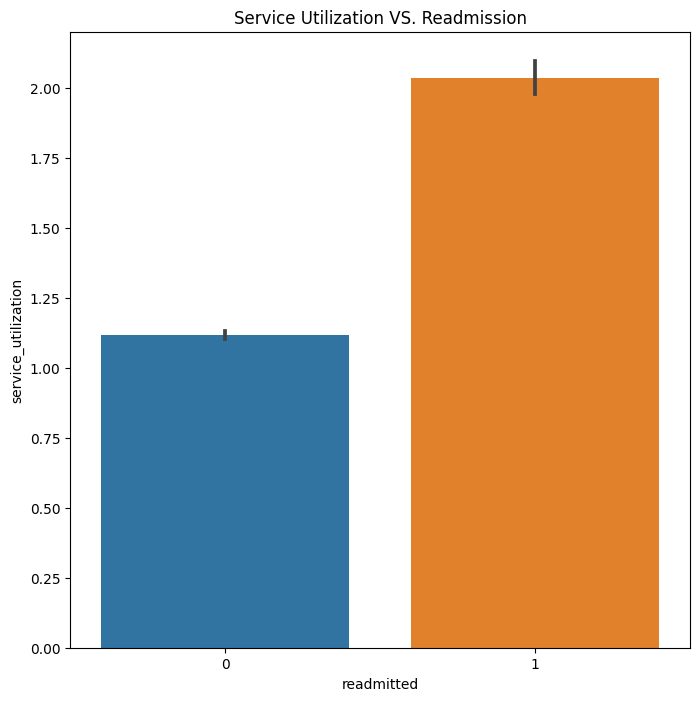

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

<ipython-input-37-217a4e5fe706>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-37-217a4e5fe706>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

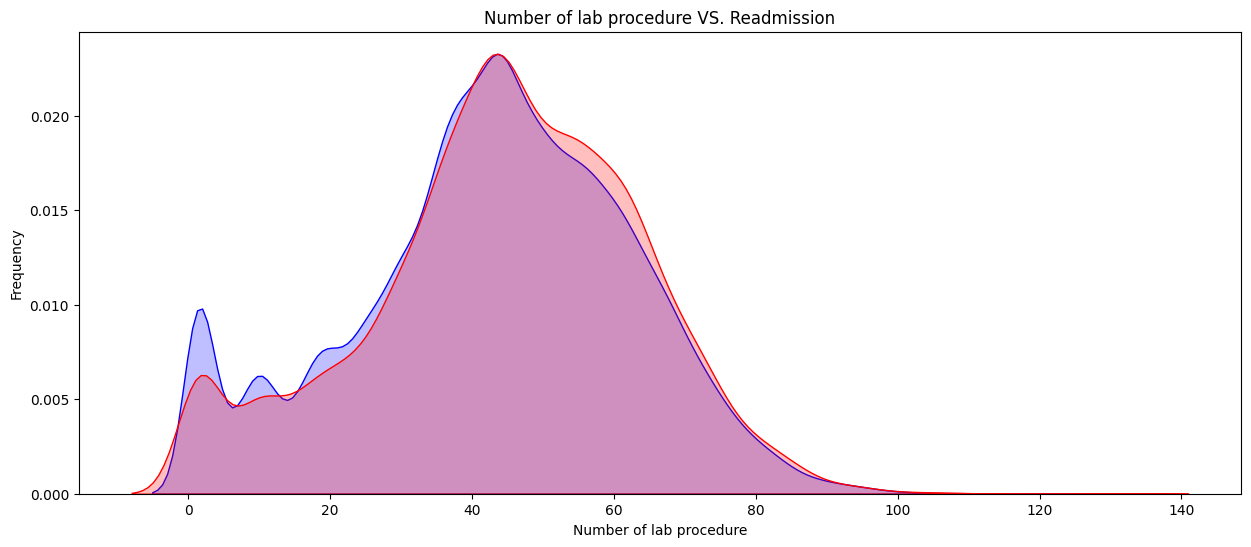

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

# Data Pre-processing

In [ ]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


In [ ]:
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
     'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
     'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
     'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
     'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
     'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

x = df[i].astype('object')

df.drop(i, axis=1, inplace=True)

df = pd.concat([df, x], axis=1)

In [ ]:
df.dtypes

race                        object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
examide                     object
citoglipton                 object
readmitted                   int64
service_utilization          int64
numchange                    int64
encounter_id                object
patient_nbr                 object
gender                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: nummed, dtype: int64

In [ ]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['number_outpatient',
 'numchange',
 'num_lab_procedures',
 'num_medications',
 'num_procedures',
 'number_inpatient',
 'time_in_hospital',
 'service_utilization',
 'number_diagnoses',
 'number_emergency']

In [ ]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [ ]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [ ]:
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [ ]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [ ]:
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

race                                   object
time_in_hospital                        int64
num_lab_procedures                      int64
num_procedures                          int64
num_medications                         int64
number_diagnoses                        int64
examide                                object
citoglipton                            object
readmitted                              int64
service_utilization                     int64
numchange                               int64
encounter_id                           object
patient_nbr                            object
gender                                 object
admission_type_id                      object
discharge_disposition_id               object
admission_source_id                    object
A1Cresult                               int64
metformin                               int64
repaglinide                             int64
nateglinide                             int64
chlorpropamide                    

In [ ]:
df = df.drop(['examide', 'citoglipton','encounter_id'], axis = 1)

In [ ]:
df = pd.get_dummies(df, columns=['race'])

In [ ]:
duplicate_columns = df.columns[df.columns.duplicated()]
df = df.loc[:, ~df.columns.duplicated(keep='first')]

In [ ]:
df = pd.get_dummies(df, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)

<ipython-input-51-28788f7aa14b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-51-28788f7aa14b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-51-28788f7aa14b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-51-28788f7aa14b>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matc

In [ ]:
train_data_x = df.drop(columns='readmitted')
train_data_y = df['readmitted']

##  Performing lasso for feature selection.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42) #Use smote the second time after realising class imbalance after logistic regression model, wanted to select the best features.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lasso_cv = LassoCV(alphas=np.logspace(-10, 10, 100), cv=5)
lasso_cv.fit(X_train_resampled, y_train_resampled)


LassoCV(alphas=array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876128e-07, 6.89261210e-07,
       1.09749877e-06, 1.74752840e-0...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
        cv=5)

In [ ]:
best_alpha = lasso_cv.alpha_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_resampled, y_train_resampled)

feature_importances = lasso_model.coef_

important_features = X_train.columns[feature_importances != 0]

print("Important features:")
print(important_features)


Important features:
Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'service_utilization',
       'numchange', 'patient_nbr', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone', 'change',
       'diabetesMed', 'age', 'nummed', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|numchange', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1',
   

In [ ]:
len(important_features)

71

# Modelling

In [ ]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Specify the number of splits (k) for cross-validation
k = 5  # Adjust the number of folds as needed

# Initialize lists to store evaluation metrics for out-of-sample data
out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

# Initialize lists to store evaluation metrics for in-sample data
in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []


kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Set random_state for reproducibility
for train_index, test_index in kf.split(train_data_x[important_features]):
    X, y = train_data_x[important_features], train_data_y
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to balance the training data
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    logistic_model.fit(X_train_resampled, y_train_resampled)

    # Calculate metrics for the out-of-sample test data
    y_pred = logistic_model.predict(X_test)
    y_prob = logistic_model.predict_proba(X_test)[:, 1]
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    # Calculate metrics for the in-sample data
    y_pred_in_sample = logistic_model.predict(X_train_resampled)
    y_prob_in_sample = logistic_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

# Calculate the mean of out-of-sample evaluation metrics across folds
mean_oos_accuracy_1 = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision_1= np.mean(out_of_sample_precision_scores)
mean_oos_recall_1 = np.mean(out_of_sample_recall_scores)
mean_oos_f1_1 = np.mean(out_of_sample_f1_scores)
mean_oos_auc_1 = np.mean(out_of_sample_auc_scores)

# Calculate the mean of in-sample evaluation metrics across folds
mean_in_sample_accuracy_1 = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision_1 = np.mean(in_sample_precision_scores)
mean_in_sample_recall_1 = np.mean(in_sample_recall_scores)
mean_in_sample_f1_1 = np.mean(in_sample_f1_scores)
mean_in_sample_auc_1 = np.mean(in_sample_auc_scores)




Realised class imbalance, and used SMOTE for the remaining models

In [ ]:
random_forest_model = RandomForestClassifier()

k = 5

out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []


kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(train_data_x[important_features]):
    X_train, X_test = train_data_x[important_features].iloc[train_index], train_data_x[important_features].iloc[test_index]
    y_train, y_test = train_data_y.iloc[train_index], train_data_y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    random_forest_model.fit(X_train_resampled, y_train_resampled)

    y_pred = random_forest_model.predict(X_test)
    y_prob = random_forest_model.predict_proba(X_test)[:, 1]
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    y_pred_in_sample = random_forest_model.predict(X_train_resampled)
    y_prob_in_sample = random_forest_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

mean_oos_accuracy_2 = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision_2 = np.mean(out_of_sample_precision_scores)
mean_oos_recall_2 = np.mean(out_of_sample_recall_scores)
mean_oos_f1_2 = np.mean(out_of_sample_f1_scores)
mean_oos_auc_2 = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy_2 = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision_2 = np.mean(in_sample_precision_scores)
mean_in_sample_recall_2 = np.mean(in_sample_recall_scores)
mean_in_sample_f1_2 = np.mean(in_sample_f1_scores)
mean_in_sample_auc_2 = np.mean(in_sample_auc_scores)


In [ ]:
catboost_model = CatBoostClassifier()

k = 5

out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)
for train_index, test_index in kf.split(train_data_x[important_features]):
    X, y = train_data_x[important_features], train_data_y
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    catboost_model.fit(X_train_resampled, y_train_resampled)

    y_pred = catboost_model.predict(X_test)
    y_prob = catboost_model.predict_proba(X_test)[:, 1]
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    y_pred_in_sample = catboost_model.predict(X_train_resampled)
    y_prob_in_sample = catboost_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

mean_oos_accuracy_3 = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision_3 = np.mean(out_of_sample_precision_scores)
mean_oos_recall_3 = np.mean(out_of_sample_recall_scores)
mean_oos_f1_3 = np.mean(out_of_sample_f1_scores)
mean_oos_auc_3 = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy_3 = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision_3 = np.mean(in_sample_precision_scores)
mean_in_sample_recall_3 = np.mean(in_sample_recall_scores)
mean_in_sample_f1_3 = np.mean(in_sample_f1_scores)
mean_in_sample_auc_3 = np.mean(in_sample_auc_scores)





Streaming output truncated to the last 5000 lines.
4:	learn: 0.4565590	total: 463ms	remaining: 1m 32s
5:	learn: 0.4459879	total: 508ms	remaining: 1m 24s
6:	learn: 0.4259128	total: 554ms	remaining: 1m 18s
7:	learn: 0.4128517	total: 595ms	remaining: 1m 13s
8:	learn: 0.4047708	total: 640ms	remaining: 1m 10s
9:	learn: 0.3974075	total: 681ms	remaining: 1m 7s
10:	learn: 0.3922172	total: 725ms	remaining: 1m 5s
11:	learn: 0.3877071	total: 762ms	remaining: 1m 2s
12:	learn: 0.3790774	total: 804ms	remaining: 1m 1s
13:	learn: 0.3742660	total: 853ms	remaining: 1m
14:	learn: 0.3625780	total: 895ms	remaining: 58.8s
15:	learn: 0.3437355	total: 937ms	remaining: 57.6s
16:	learn: 0.3404752	total: 974ms	remaining: 56.3s
17:	learn: 0.3362030	total: 1.02s	remaining: 55.9s
18:	learn: 0.3331360	total: 1.06s	remaining: 54.9s
19:	learn: 0.3298738	total: 1.11s	remaining: 54.6s
20:	learn: 0.3267337	total: 1.15s	remaining: 53.8s
21:	learn: 0.3209260	total: 1.19s	remaining: 53.1s
22:	learn: 0.3185804	total: 1.24s	r

In [60]:
xgboost_model = xgb.XGBClassifier(enable_categorical=True)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

oos_accuracy_scores = []
oos_precision_scores = []
oos_recall_scores = []
oos_f1_scores = []
oos_auc_scores = []

in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []

for train_index, test_index in kf.split(train_data_x[important_features]):
    X_train, X_test = train_data_x[important_features].iloc[train_index], train_data_x[important_features].iloc[test_index]
    y_train, y_test = train_data_y.iloc[train_index], train_data_y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    categorical_columns = ['patient_nbr', 'change', 'diabetesMed', 'age', 'nummed', 'age|number_diagnoses', 'change|num_medications']
    X_train_resampled[categorical_columns] = X_train_resampled[categorical_columns].astype("category")
    X_test[categorical_columns] = X_test[categorical_columns].astype("category")

    xgboost_model.fit(X_train_resampled, y_train_resampled)

    y_pred = xgboost_model.predict(X_test)
    y_prob = xgboost_model.predict_proba(X_test)[:, 1]

    oos_accuracy = accuracy_score(y_test, y_pred)
    oos_precision = precision_score(y_test, y_pred)
    oos_recall = recall_score(y_test, y_pred)
    oos_f1 = f1_score(y_test, y_pred)
    oos_auc = roc_auc_score(y_test, y_prob)

    oos_accuracy_scores.append(oos_accuracy)
    oos_precision_scores.append(oos_precision)
    oos_recall_scores.append(oos_recall)
    oos_f1_scores.append(oos_f1)
    oos_auc_scores.append(oos_auc)

    y_pred_in_sample = xgboost_model.predict(X_train_resampled)
    y_prob_in_sample = xgboost_model.predict_proba(X_train_resampled)[:, 1]

    in_sample_accuracy = accuracy_score(y_train_resampled, y_pred_in_sample)
    in_sample_precision = precision_score(y_train_resampled, y_pred_in_sample)
    in_sample_recall = recall_score(y_train_resampled, y_pred_in_sample)
    in_sample_f1 = f1_score(y_train_resampled, y_pred_in_sample)
    in_sample_auc = roc_auc_score(y_train_resampled, y_prob_in_sample)

    in_sample_accuracy_scores.append(in_sample_accuracy)
    in_sample_precision_scores.append(in_sample_precision)
    in_sample_recall_scores.append(in_sample_recall)
    in_sample_f1_scores.append(in_sample_f1)
    in_sample_auc_scores.append(in_sample_auc)

mean_oos_accuracy_4 = sum(oos_accuracy_scores) / k
mean_oos_precision_4 = sum(oos_precision_scores) / k
mean_oos_recall_4 = sum(oos_recall_scores) / k
mean_oos_f1_4 = sum(oos_f1_scores) / k
mean_oos_auc_4 = sum(oos_auc_scores) / k

mean_in_sample_accuracy_4 = sum(in_sample_accuracy_scores) / k
mean_in_sample_precision_4 = sum(in_sample_precision_scores) / k
mean_in_sample_recall_4 = sum(in_sample_recall_scores) / k
mean_in_sample_f1_4 = sum(in_sample_f1_scores) / k
mean_in_sample_auc_4 = sum(in_sample_auc_scores) / k


In [61]:
lgbm_model = lgb.LGBMClassifier(enable_categorical=True)

k = 5

out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)
for train_index, test_index in kf.split(train_data_x[important_features]):
    X, y = train_data_x[important_features], train_data_y
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    categorical_columns = ['patient_nbr', 'change', 'diabetesMed', 'age', 'nummed', 'age|number_diagnoses', 'change|num_medications']
    X_train_resampled[categorical_columns] = X_train_resampled[categorical_columns].astype("category")
    X_test[categorical_columns] = X_test[categorical_columns].astype("category")


    lgbm_model.fit(X_train_resampled, y_train_resampled)

    y_pred = lgbm_model.predict(X_test)
    y_prob = lgbm_model.predict_proba(X_test)[:, 1]
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    y_pred_in_sample = lgbm_model.predict(X_train_resampled)
    y_prob_in_sample = lgbm_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

mean_oos_accuracy_5 = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision_5 = np.mean(out_of_sample_precision_scores)
mean_oos_recall_5 = np.mean(out_of_sample_recall_scores)
mean_oos_f1_5 = np.mean(out_of_sample_f1_scores)
mean_oos_sample_auc_5 = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy_5 = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision_5 = np.mean(in_sample_precision_scores)
mean_in_sample_recall_5 = np.mean(in_sample_recall_scores)
mean_in_sample_f1_5 = np.mean(in_sample_f1_scores)
mean_in_sample_auc_5 = np.mean(in_sample_auc_scores)


<ipython-input-61-d5ab46a0094a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[categorical_columns] = X_test[categorical_columns].astype("category")


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Number of positive: 68345, number of negative: 68345
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6425
[LightGBM] [Info] Number of data points in the train set: 136690, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unkno

<ipython-input-61-d5ab46a0094a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[categorical_columns] = X_test[categorical_columns].astype("category")


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Number of positive: 68289, number of negative: 68289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6327
[LightGBM] [Info] Number of data points in the train set: 136578, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unkno

<ipython-input-61-d5ab46a0094a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[categorical_columns] = X_test[categorical_columns].astype("category")


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Number of positive: 68282, number of negative: 68282
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6376
[LightGBM] [Info] Number of data points in the train set: 136564, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unkno

<ipython-input-61-d5ab46a0094a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[categorical_columns] = X_test[categorical_columns].astype("category")


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Number of positive: 68271, number of negative: 68271
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6390
[LightGBM] [Info] Number of data points in the train set: 136542, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unkno

<ipython-input-61-d5ab46a0094a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[categorical_columns] = X_test[categorical_columns].astype("category")


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Number of positive: 68333, number of negative: 68333
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6349
[LightGBM] [Info] Number of data points in the train set: 136666, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unkno

In [ ]:
import pandas as pd


metrics_data = {
    "Model": ["Logistic Regression", "Random Forest", "Catboost Classifier", "XBG Classifier", "LightGBM Classifier"],
    "Mean_OOS_Accuracy": [mean_oos_accuracy_1, mean_oos_accuracy_2, mean_oos_accuracy_3, mean_oos_accuracy_4, mean_oos_accuracy_5],
    "Mean_OOS_Precision": [mean_oos_precision_1, mean_oos_precision_2, mean_oos_precision_3, mean_oos_precision_4, mean_oos_precision_5],
    "Mean_OOS_Recall": [mean_oos_recall_1, mean_oos_recall_2, mean_oos_recall_3, mean_oos_recall_4, mean_oos_recall_5],
    "Mean_OOS_F1_Score": [mean_oos_f1_1, mean_oos_f1_2, mean_oos_f1_3, mean_oos_f1_4, mean_oos_f1_5],
    "Mean_OOS_AUC": [mean_oos_auc_1, mean_oos_auc_2, mean_oos_auc_3, mean_oos_auc_4, mean_oos_sample_auc_5],
    "Mean_In_Sample_Accuracy": [mean_in_sample_accuracy_1, mean_in_sample_accuracy_2, mean_in_sample_accuracy_3, mean_in_sample_accuracy_4, mean_in_sample_accuracy_5],
    "Mean_In_Sample_Precision": [mean_in_sample_precision_1, mean_in_sample_precision_2, mean_in_sample_precision_3, mean_in_sample_precision_4, mean_in_sample_precision_5],
    "Mean_In_Sample_Recall": [mean_in_sample_recall_1, mean_in_sample_recall_2, mean_in_sample_recall_3, mean_in_sample_recall_4, mean_in_sample_recall_5],
    "Mean_In_Sample_F1_Score": [mean_in_sample_f1_1, mean_in_sample_f1_2, mean_in_sample_f1_3, mean_in_sample_f1_4, mean_in_sample_f1_5],
    "Mean_In_Sample_AUC": [mean_in_sample_auc_1, mean_in_sample_auc_2, mean_in_sample_auc_3, mean_in_sample_auc_4, mean_in_sample_auc_5],
}

metrics_df = pd.DataFrame(metrics_data)




In [63]:
metrics_df

,Model,Mean_OOS_Accuracy,Mean_OOS_Precision,Mean_OOS_Recall,Mean_OOS_F1_Score,Mean_OOS_AUC,Mean_In_Sample_Accuracy,Mean_In_Sample_Precision,Mean_In_Sample_Recall,Mean_In_Sample_F1_Score,Mean_In_Sample_AUC
0,Logistic Regression,0.114738,0.114738,1.000000,0.205853,0.508768,0.500000,0.500000,1.000000,0.666667,0.507201
1,Random Forest,0.882743,0.309541,0.018076,0.034148,0.600457,0.999985,1.000000,0.999971,0.999985,1.000000
2,Catboost Classifier,0.883738,0.400844,0.025029,0.047079,0.632624,0.936551,0.997438,0.875351,0.932415,0.974496
3,XBG Classifier,0.118336,0.114889,0.997039,0.206033,0.535153,0.944905,0.998024,0.891576,0.941801,0.980129
4,LightGBM Classifier,0.881177,0.382669,0.057932,0.100615,0.643679,0.941445,0.993477,0.888726,0.938186,0.969013


In [64]:
metrics_df.to_csv("metrics.csv")